## Assignment

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
print (boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

Generating Descriptive Statistics and Visualizations
Boxplot for 'Median value of owner-occupied homes'

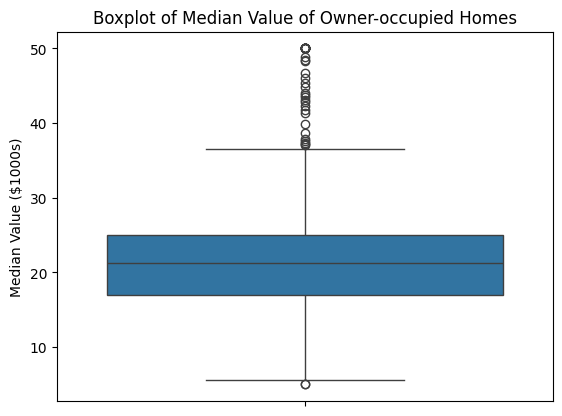

In [6]:

sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()


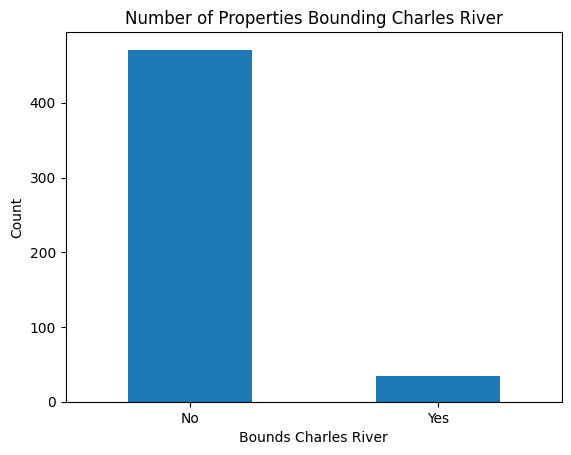

In [7]:
# Box Plot for Charles River
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Number of Properties Bounding Charles River')
plt.xlabel('Bounds Charles River')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


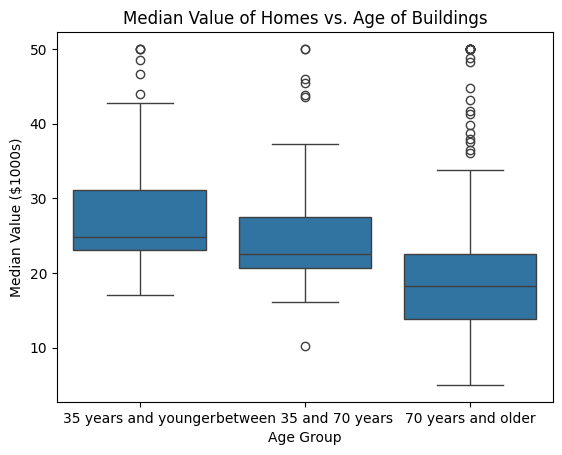

In [8]:
# Box MEDV vs AGE
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Homes vs. Age of Buildings')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()


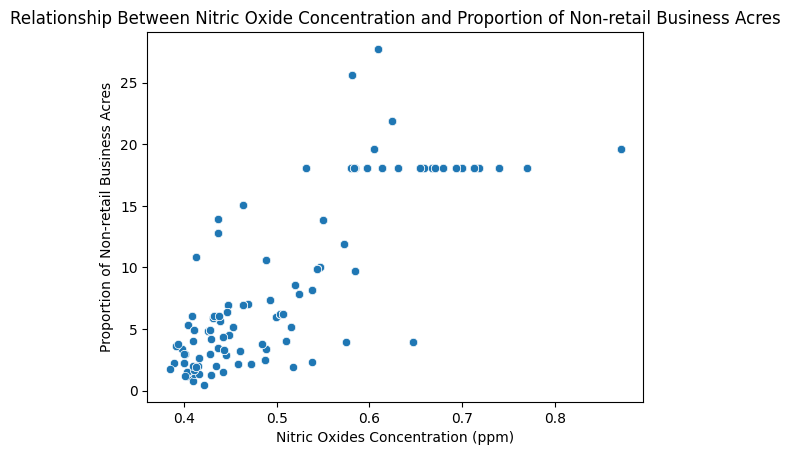

In [9]:
# Scatter plot NOX vs INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship Between Nitric Oxide Concentration and Proportion of Non-retail Business Acres')
plt.xlabel('Nitric Oxides Concentration (ppm)')
plt.ylabel('Proportion of Non-retail Business Acres')
plt.show()


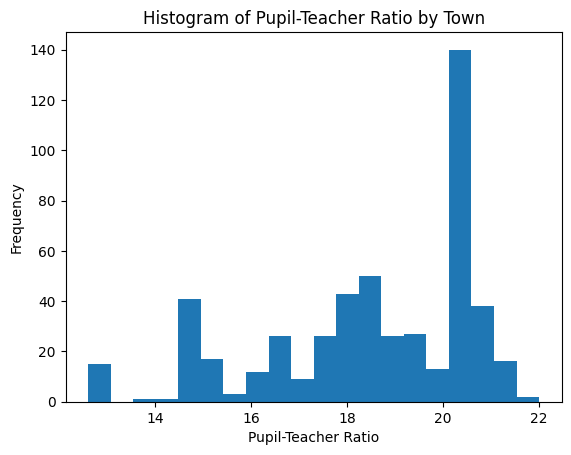

In [10]:
# Histogram pupil teacher ratio
boston_df['PTRATIO'].plot(kind='hist', bins=20)
plt.title('Histogram of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [11]:
# TTest for MEDV based on Charles River Boundary
import scipy.stats as stats

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(group1, group2)


In [12]:
t_stat

3.996437466090509

In [13]:
p_value

7.390623170519905e-05

In [14]:
# ANOVA for MEDV acrosee age
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)


In [15]:
anova_result

,sum_sq,df,F,PR(>F)
AGE_GROUP,5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


In [17]:
# # Pearson correalation between NOX and INDUS 
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
correlation


0.7636514469209151

In [18]:
p_value

7.913361061239527e-98

In [22]:
# Regression Analysis for DIS on MEDV
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        18:18:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Dependent Variable (MEDV): The dependent variable in this model is MEDV, representing the median value of owner-occupied homes.

R-squared (0.062): The R-squared value is 0.062, which means that approximately 6.2% of the variance in the median value of homes is explained by the distance to employment centers. This is a relatively low value, indicating that DIS alone does not strongly predict MEDV.

Adjusted R-squared (0.061): The adjusted R-squared is very close to the R-squared, which is expected in a simple regression with only one predictor. It adjusts for the number of predictors in the model and is a more accurate measure of the model's explanatory power.

F-statistic (33.58) and Prob (F-statistic) (1.21e-08): The F-statistic tests the overall significance of the model. Here, the F-statistic is 33.58, and the probability of observing such a statistic under the null hypothesis is very low (around 0.0000000121). This suggests that the model is statistically significant.

Coefficients (const and DIS):

Constant (const): The constant coefficient is 18.3901 with a standard error of 0.817. This value represents the expected value of MEDV when DIS is 0. It's statistically significant, as indicated by its p-value (close to 0).
DIS: The coefficient for DIS is 1.0916 with a standard error of 0.188. This means that for each unit increase in DIS, the median value of homes (MEDV) is expected to increase by approximately 1.0916 thousand dollars, holding all other factors constant. This coefficient is statistically significant (p-value close to 0).
Confidence Interval for DIS: The 95% confidence interval for the DIS coefficient ranges from 0.722 to 1.462. This means we can be 95% confident that the true coefficient of DIS lies within this range.

Omnibus, Prob(Omnibus), Jarque-Bera (JB), and Prob(JB): These are tests for the normality of residuals. The Omnibus and JB tests have very low p-values, suggesting that the residuals are not normally distributed. This can affect inferences drawn from the model.

Durbin-Watson: The Durbin-Watson statistic is around 0.570, indicating potential positive autocorrelation in the residuals. This should be investigated further as it can impact the validity of the model.

Skew and Kurtosis: The values for skewness and kurtosis indicate that the distribution of residuals is not normal, which is consistent with the results from the Omnibus and JB tests.

Condition Number: A condition number of 9.32 suggests moderate multicollinearity is not a major concern in this model.

In summary, the model indicates a statistically significant positive relationship between DIS and MEDV, but it explains only a small portion of the variance in MEDV. 